# Análisis de datos para la creación del modelo predictivo de diagnóstico de enfermedades cardiovasculares

Iniciaremos la exploración de este [conjunto de datos](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) proporcionado por el usuario de [Kaggle](https://www.kaggle.com/) [sulianova](https://www.kaggle.com/sulianova). Este conjunto de datos consiste en un total de 70,000 registros de pacientes, presentando 11 características y una característica objetivo. Todos los registros fueron recolectados durante exámenes médicos.

## Descripción de los datos

Hay 3 tipos diferentes de características de entrada:
* Objetiva: información objetiva.
* Revisión: resultados de una revisión médica.
* Subjetiva: información dada por el paciente.

### Características:
|Característica|Tipo de Característica|Nombre en el Dataset|Unidad|
|:-------------|:---------------------|:-------------------|:----:|
|Edad  | Objetiva | age    | int (días)|
|Peso  | Objetiva | height | int (cm) |
|Talla | Objetiva | weight | float (kg) |
|Sexo  | Objetiva | gender | 1: mujer, 2: hombre |
|Presión Arterial Sistólica | Revisión | ap_hi | int (mmHg)|
|Presión Arterial Diastólica| Revisión | ap_lo | int (mmHg)|
|Colesterol | Revisión | cholesterol | 1: normal, 2: arriba de lo normal, 3: muy arriba de lo normal |
|Glucosa    | Revisión | gluc | 1: normal, 2: arriba de lo normal, 3: muy arriba de lo normal |
|Fumador | Subjetiva | smoke | binario |
|Consumo de Alcohol | Subjetiva | alco | binario |
|Actividad Física | Subjetiva | active | binario |
|Presencia o ausencia de una Enfermedad Cardiovacular | Variable objetivo | cardio | binario |

## Conociendo y limpiando los datos

In [1]:
# importando librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# importando el dataset
# en este caso el carácter que delimita es ';'
data = pd.read_csv("cardio_train.csv", delimiter = ';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# Para este proyecto el campo id no nos interesa
data.drop(['id'], axis=1, inplace=True)
# inplace sobreescribe el df, evita asignar df = df.drop()

# La edad esta dada en días, la transformaremos a años para un mejor entendimiento
data['age'] = data['age']/365

# De igual manera nos es mas facíl ver la talla como metros en vez de cm
data['height'] = data['height']/100

# Mas delante vamos a comprobar el impacto que tiene para el entrenamiento quitar los campos de peso y talla
# y en su lugar solo tomar en cuenta el índice de masa corporal (IMC=peso(kg)/(talla(m))^2)
data['imc'] = data['weight'] / data['height']**2

# para los atributos clasificados vamos a indexarlos desde 0
data['gender'] = data['gender']-1
data['cholesterol'] = data['cholesterol']-1
data['gluc'] = data['gluc']-1

data.head().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc
0,50.39,1,1.68,62.0,110,80,0,0,0,0,1,0,21.97
1,55.42,0,1.56,85.0,140,90,2,0,0,0,1,1,34.93
2,51.66,0,1.65,64.0,130,70,2,0,0,0,0,1,23.51
3,48.28,1,1.69,82.0,150,100,0,0,0,0,1,1,28.71
4,47.87,0,1.56,56.0,100,60,0,0,0,0,0,0,23.01


In [3]:
# Identificando la presencia de valores nulos
data.isna().sum()
# En este caso, no hay

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
imc            0
dtype: int64

In [4]:
# Identificando filas duplicadas
duplicados = len(data) - len(data.drop_duplicates())  # Solo para ver cuantas filas estan duplicadas
print("filas duplicadas = {0}".format(duplicados)) 

# En este caso no hace falta eliminar filas duplicadas, debido a la naturaleza de los datos
# data.drop_duplicates(inplace=True)
# print("{0} campos duplicados borrados, nuevas dimensiones del dataset = {1}".format(duplicados,data.shape))

filas duplicadas = 24


In [5]:
# Ahora con los datos un poco más legibles podemos ver un resumen rápido de las características
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.34,6.76,29.58,48.39,53.98,58.43,64.97
gender,70000.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00
height,70000.0,1.64,0.08,0.55,1.59,1.65,1.70,2.50
weight,70000.0,74.21,14.40,10.00,65.00,72.00,82.00,200.00
ap_hi,70000.0,128.82,154.01,-150.00,120.00,120.00,140.00,16020.00
ap_lo,70000.0,96.63,188.47,-70.00,80.00,80.00,90.00,11000.00
cholesterol,70000.0,0.37,0.68,0.00,0.00,0.00,1.00,2.00
gluc,70000.0,0.23,0.57,0.00,0.00,0.00,0.00,2.00
smoke,70000.0,0.09,0.28,0.00,0.00,0.00,0.00,1.00
alco,70000.0,0.05,0.23,0.00,0.00,0.00,0.00,1.00


De este resumen notamos que 
1. La distribución de personas enfermas con sanas es bastante balanceada.
2. Parace haber bastantes variables objetivas con valores atípicos, pacticularmente talla, peso, ap_hi y ap_lo. Habrá que revisar y limpiar estos datos.

Primero vamos a analizar las relaciones entre peso, talla e imc.

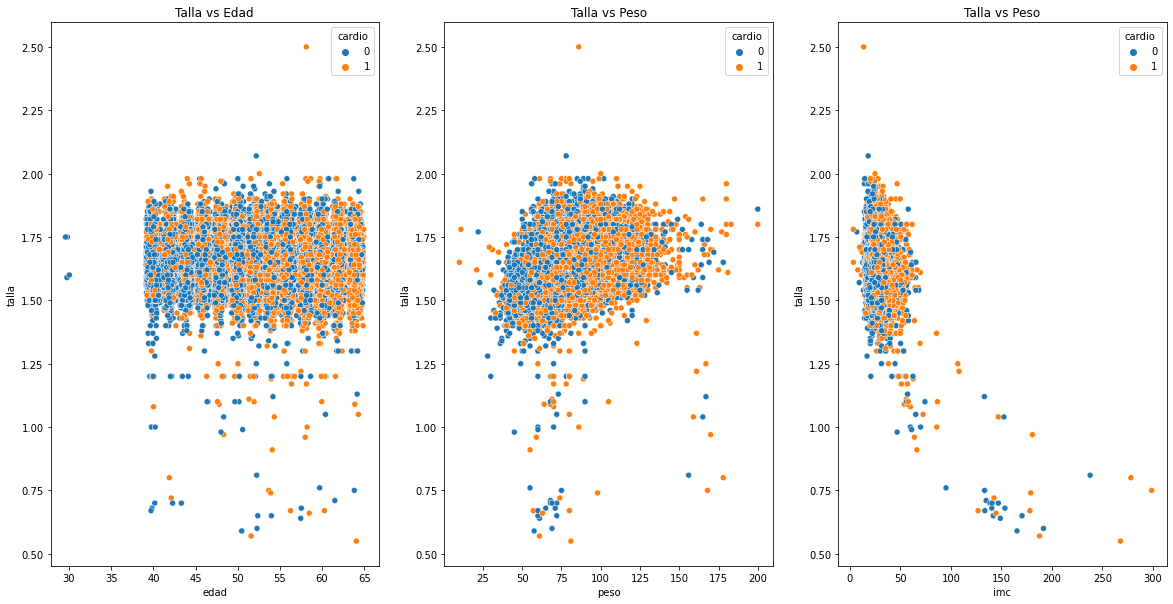

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,10))

sns.scatterplot(data['age'],data['height'],hue=data['cardio'],ax=ax1)
ax1.set(xlabel='edad', ylabel='talla')
ax1.set_title('Talla vs Edad')

sns.scatterplot(data['weight'],data['height'],hue=data['cardio'],ax=ax2)
ax2.set(xlabel='peso', ylabel='talla')
ax2.set_title('Talla vs Peso')

sns.scatterplot(data['imc'],data['height'],hue=data['cardio'],ax=ax3)
ax3.set(xlabel='imc', ylabel='talla')
ax3.set_title('Talla vs Peso')

plt.show()

1. Podemos notar que no existen niños en nuestro dataset, lo que hace que la aparición de personas con menos de 1.20m de altura sea muy raro (La estatura adulta promedio entre las personas con enanismo es de 1.22m). También vemos que hay una sola persona que mide 2.5m, asi que, tomaremos esto también como una variable atípica (El jugador más alto que jamás ha pisado una cancha de la NBA media 2.31m).
2. En la otra gráfica existen personas que miden menos de un metro de altura pero pesan mas de 175Kg, esto parece no ser muy real. Si nos basamos en la siguiente tabla de imc <img src="imc-rangos.webp" width="30%"> tenemos que valores arriba de 50 son muy poco comunes y valores arriba de 70 se antojan casi imposibles. De manera similar, valores de imc debajo de 16 (por la naturaleza de este proyecto) los omitiremos.

In [7]:
print(f'Dimensiones del dataset: {data.shape}')

# limpiando datos
# si la altura es menor a 1.22m o mayor a 2.3m borramos la fila
filtro1 =(data['height']<1.22) | (data['height']>2.3)
data.drop(index = list(data[filtro1].index),inplace=True)
print(f'Nuevas dimensiones del dataset: {data.shape}')

# si el imc es menor a 10 o mayor a 70 borramos la fila
filtro2 =(data['imc']<10) | (data['imc']>70)
data.drop(index = list(data[filtro2].index),inplace=True)
print(f'Nuevas dimensiones del dataset: {data.shape}')

Dimensiones del dataset: (70000, 13)
Nuevas dimensiones del dataset: (69913, 13)
Nuevas dimensiones del dataset: (69904, 13)


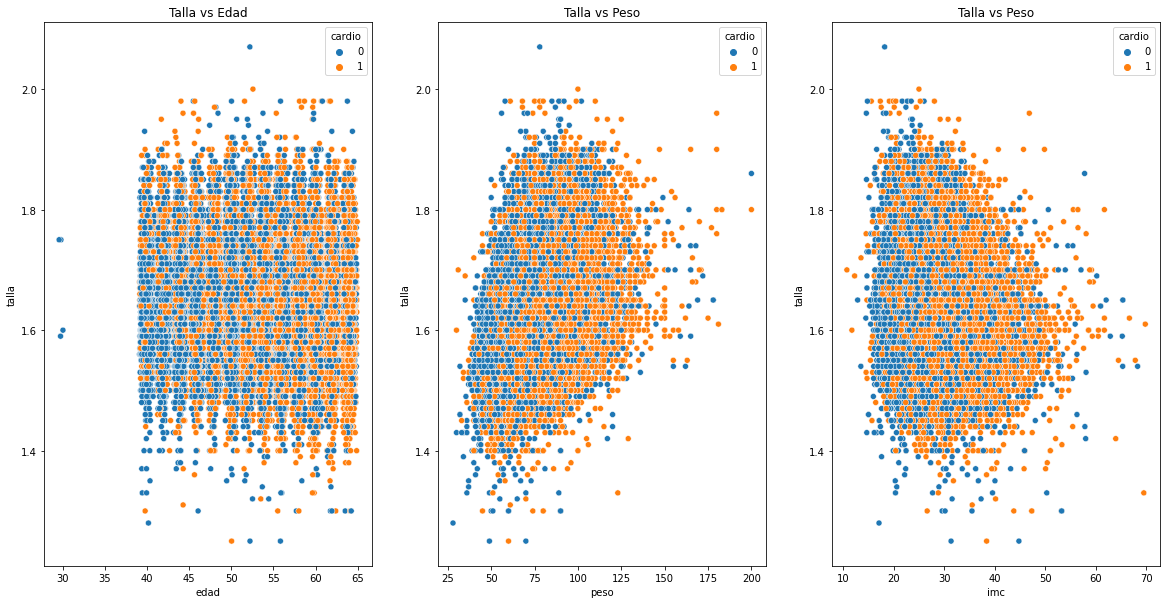

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,10))

sns.scatterplot(data['age'],data['height'],hue=data['cardio'],ax=ax1)
ax1.set(xlabel='edad', ylabel='talla')
ax1.set_title('Talla vs Edad')

sns.scatterplot(data['weight'],data['height'],hue=data['cardio'],ax=ax2)
ax2.set(xlabel='peso', ylabel='talla')
ax2.set_title('Talla vs Peso')

sns.scatterplot(data['imc'],data['height'],hue=data['cardio'],ax=ax3)
ax3.set(xlabel='imc', ylabel='talla')
ax3.set_title('Talla vs Peso')

plt.show()

Ahora los valores de peso y talla parecen dar un poco mas de sentido.
Lo siguiente será analizar los datos de presión arterial.

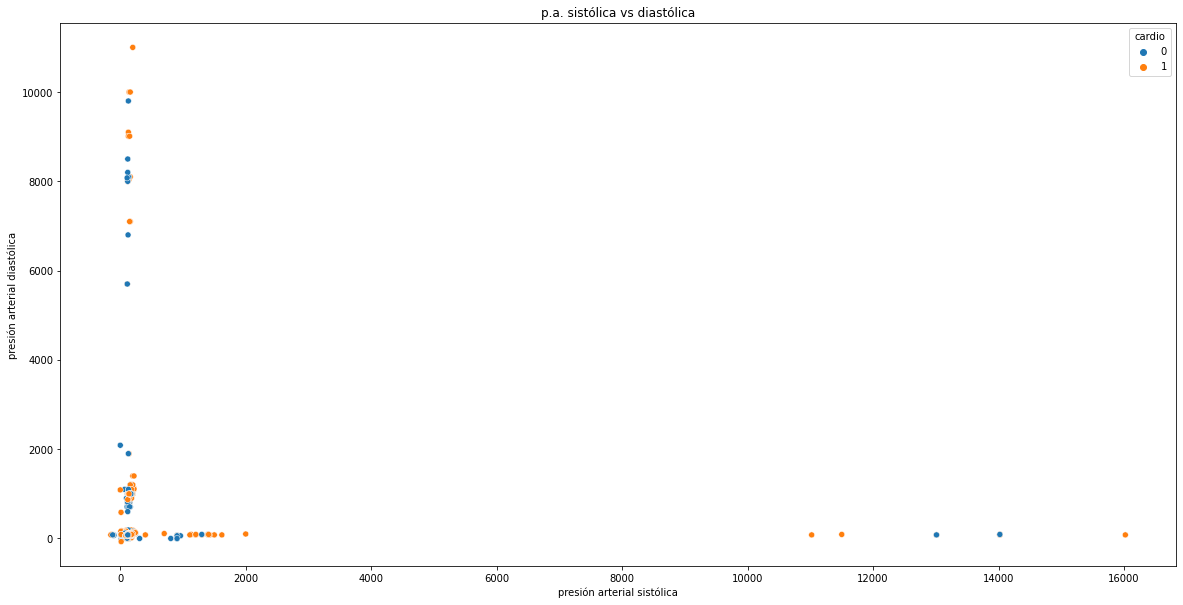

In [9]:
fig, ax1 = plt.subplots(1,1, figsize=(20,10))

sns.scatterplot(data['ap_hi'],data['ap_lo'],hue=data['cardio'],ax=ax1)
ax1.set(xlabel='presión arterial sistólica', ylabel='presión arterial diastólica')
ax1.set_title('p.a. sistólica vs diastólica')

plt.show()

* Aquí claremente podemos notar que existen variables con valores irreales. Tomando como base la siguiente tabla de presión arterial <img src="rangos-presion-arterial.png" width="40%"> se tiene que la presión sistólica a lo más puede estar en un rango (dando un poco del holgura) de 50 mmHg a 200 mmHg, mientras que la presión diastólica se encuentra en un rango de 40 mmHg a 150 mmHg.

In [10]:
print(f'Dimensiones del dataset: {data.shape}')

# limpiando datos
# si la p.s. es menor a 50mmHg o mayor a 200mmHg borramos la fila
filtro3 =(data['ap_hi']<50) | (data['ap_hi']>200)
data.drop(index = list(data[filtro3].index),inplace=True)
print(f'Nuevas dimensiones del dataset: {data.shape}')

# si la p.d. es menor a 40mmHg o mayor a 150mmHg borramos la fila
filtro4 =(data['ap_lo']<40) | (data['ap_lo']>150)
data.drop(index = list(data[filtro4].index),inplace=True)
print(f'Nuevas dimensiones del dataset: {data.shape}')

Dimensiones del dataset: (69904, 13)
Nuevas dimensiones del dataset: (69618, 13)
Nuevas dimensiones del dataset: (68613, 13)


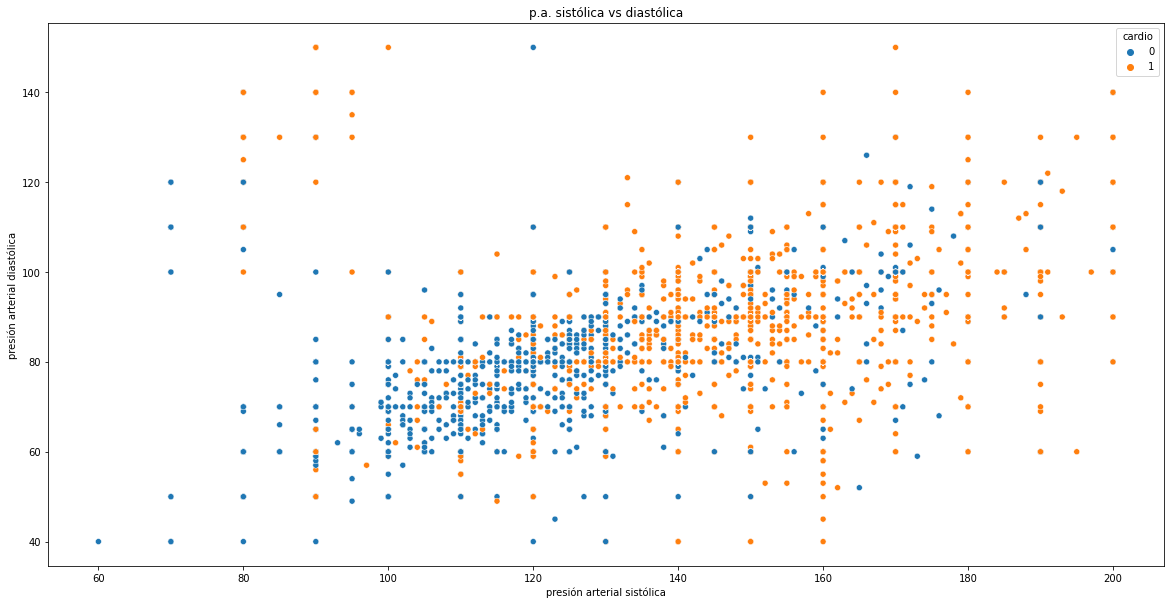

In [11]:
fig, ax1 = plt.subplots(1,1, figsize=(20,10))

sns.scatterplot(data['ap_hi'],data['ap_lo'],hue=data['cardio'],ax=ax1)
ax1.set(xlabel='presión arterial sistólica', ylabel='presión arterial diastólica')
ax1.set_title('p.a. sistólica vs diastólica')

plt.show()

Ahora tenemos presiones alteriales mas reales.

## Explorando los datos

Ahora que tenemos nuestro dataset limpio podemos empezar a analizar y buscar algunas relaciones.

In [12]:
mujeres = len(data['gender'][data['gender']==0])
hombres = len(data['gender'][data['gender']==1])
total = mujeres + hombres
print("mujeres={0}({1:.2f}%), hombres={2}({3:.2f}%), total={4}"
      .format(mujeres,mujeres/total*100,hombres,hombres/total*100,total))

mujeres=44694(65.14%), hombres=23919(34.86%), total=68613


De lo siguiente podemos notar que nuestro dataset se encuentra compuesto por mujeres en su mayoria.

In [13]:
filtro = (data['cardio']==1)
pTot  = len(data['cardio'][filtro])
pMuj = len(data['cardio'][(data['gender']==0)&filtro])
pHom = len(data['cardio'][(data['gender']==1)&filtro])
print("Personas enfermas por sexo")
print("mujeres={0}({1:.2f}%), hombres={2}({3:.2f}%), total={4}({5:.2f}%)"
      .format(pMuj,pMuj/mujeres*100,
              pHom,pHom/hombres*100,
              pTot,pTot/total*100))

Personas enfermas por sexo
mujeres=21990(49.20%), hombres=11944(49.94%), total=33934(49.46%)


Respecto al total de mujeres, un 49.20% se encuentran enfermas y respecto al total de hombres un 49.94% se encuentran enfermos, esto deja notar que tenemos una población de personas sanas y enfermas bastante equilibrada.

In [14]:
for imc in [25,30,35,40,50]:
    filtro = (data['imc']>imc)
    pTot = len(data['cardio'][filtro])
    pEnf = len(data['cardio'][filtro&(data['cardio']==1)])
    pSan = len(data['cardio'][filtro&(data['cardio']==0)])
    print("Personas con IMC > " + str(imc))
    print("personas enfermas={0}({1:.2f}%), personas sanas={2}({3:.2f}%), total={4}({5:.2f}%)\n"
          .format(pEnf,pEnf/pTot*100,
                  pSan,pSan/pTot*100,
                  pTot,pTot/total*100))

Personas con IMC > 25
personas enfermas=23634(55.58%), personas sanas=18891(44.42%), total=42525(61.98%)

Personas con IMC > 30
personas enfermas=11184(62.52%), personas sanas=6705(37.48%), total=17889(26.07%)

Personas con IMC > 35
personas enfermas=4035(67.83%), personas sanas=1914(32.17%), total=5949(8.67%)

Personas con IMC > 40
personas enfermas=1184(69.16%), personas sanas=528(30.84%), total=1712(2.50%)

Personas con IMC > 50
personas enfermas=110(71.43%), personas sanas=44(28.57%), total=154(0.22%)



La probabilidad de padecer alguna enfermedad cardiovascular va aumentando conforme el IMC del paciente sea más elevado.

In [15]:
for press in [[120,80],[140,90],[160,100],[180,110]]:
    filtro = (data['ap_hi']>press[0])|(data['ap_lo']>press[1])
    pTot = len(data['cardio'][filtro])
    pEnf = len(data['cardio'][filtro&(data['cardio']==1)])
    pSan = len(data['cardio'][filtro&(data['cardio']==0)])
    print("Personas con presión sistólica > " + str(press[0]) + ", diastólica > " + str(press[1]))
    print("personas enfermas={0}({1:.2f}%), personas sanas={2}({3:.2f}%), total={4}({5:.2f}%)\n"
          .format(pEnf,pEnf/pTot*100,
                  pSan,pSan/pTot*100,
                  pTot,pTot/total*100))

Personas con presión sistólica > 120, diastólica > 80
personas enfermas=21767(73.10%), personas sanas=8010(26.90%), total=29777(43.40%)

Personas con presión sistólica > 140, diastólica > 90
personas enfermas=8834(84.67%), personas sanas=1599(15.33%), total=10433(15.21%)

Personas con presión sistólica > 160, diastólica > 100
personas enfermas=1700(85.38%), personas sanas=291(14.62%), total=1991(2.90%)

Personas con presión sistólica > 180, diastólica > 110
personas enfermas=375(82.42%), personas sanas=80(17.58%), total=455(0.66%)



El riesgo de padecer una enfermedad cardiovascular aumenta bastante cuando el paciente tiene una presión arterial elevada.

In [16]:
filtro = ((data['ap_hi']>120)|(data['ap_lo']>80))&(data['imc']>25)
pTot = len(data['cardio'][filtro])
pEnf = len(data['cardio'][filtro&(data['cardio']==1)])
pSan = len(data['cardio'][filtro&(data['cardio']==0)])
print("Personas con imc alto y presion arterial alta")
print("personas enfermas={0}({1:.2f}%), personas sanas={2}({3:.2f}%), total={4}({5:.2f}%)"
      .format(pEnf,pEnf/pTot*100,
              pSan,pSan/pTot*100,
              pTot,pTot/total*100))

Personas con imc alto y presion arterial alta
personas enfermas=16503(74.43%), personas sanas=5671(25.57%), total=22174(32.32%)


Parece haber una fuerte relación entre personas con imc alto y presión arterial elevada, además de propiciar enormemente enfermedades cardiovasculares si un paciente padece los dos a la vez.

In [17]:
filtro = (data['imc']>24.9)&(data['smoke']==1)
pTot = len(data['cardio'][filtro])
pEnf = len(data['cardio'][filtro&(data['cardio']==1)])
pSan = len(data['cardio'][filtro&(data['cardio']==0)])
print("Personas fumadoras con imc grande")
print("personas enfermas={0}({1:.2f}%), personas sanas={2}({3:.2f}%), total={4}({5:.2f}%)"
      .format(pEnf,pEnf/pTot*100,
              pSan,pSan/pTot*100,
              pTot,pTot/total*100))

Personas fumadoras con imc grande
personas enfermas=2060(53.91%), personas sanas=1761(46.09%), total=3821(5.57%)


Parece que el fumar no propicia que una persona tenga sobrepeso.

In [18]:
filtro = ((data['ap_hi']>120)|(data['ap_lo']>80))&(data['smoke']==1)
pTot = len(data['cardio'][filtro])
pEnf = len(data['cardio'][filtro&(data['cardio']==1)])
pSan = len(data['cardio'][filtro&(data['cardio']==0)])
print("Personas fumadoras con presion arterial alta")
print("personas enfermas={0}({1:.2f}%), personas sanas={2}({3:.2f}%), total={4}({5:.2f}%)"
      .format(pEnf,pEnf/pTot*100,
              pSan,pSan/pTot*100,
              pTot,pTot/total*100))

Personas fumadoras con presion arterial alta
personas enfermas=2052(69.44%), personas sanas=903(30.56%), total=2955(4.31%)


Sin embargo, este vicio si parece estar presente de manera tangible en personas con presión arterial elevada. Por otro lado, la proporción de personas con esta condición respecto al total es pequeña.

In [19]:
indic = ["arriba de lo normal", "muy arriba de lo normal"]

for cole in range(0,2):
    filtro = data['cholesterol']>cole
    pTot = len(data['cardio'][filtro])
    pEnf = len(data['cardio'][filtro&(data['cardio']==1)])
    pSan = len(data['cardio'][filtro&(data['cardio']==0)])
    print("Personas con colesterol " + indic[cole])
    print("personas enfermas={0}({1:.2f}%), personas sanas={2}({3:.2f}%), total={4}({5:.2f}%)\n"
          .format(pEnf,pEnf/pTot*100,
                  pSan,pSan/pTot*100,
                  pTot,pTot/total*100))

Personas con colesterol arriba de lo normal
personas enfermas=11529(67.24%), personas sanas=5618(32.76%), total=17147(24.99%)

Personas con colesterol muy arriba de lo normal
personas enfermas=5997(76.27%), personas sanas=1866(23.73%), total=7863(11.46%)



In [20]:
for gluc in range(0,2):
    filtro = data['gluc']>gluc
    pTot = len(data['cardio'][filtro])
    pEnf = len(data['cardio'][filtro&(data['cardio']==1)])
    pSan = len(data['cardio'][filtro&(data['cardio']==0)])
    print("Personas con glucosa " + indic[gluc])
    print("personas enfermas={0}({1:.2f}%), personas sanas={2}({3:.2f}%), total={4}({5:.2f}%)\n"
          .format(pEnf,pEnf/pTot*100,
                  pSan,pSan/pTot*100,
                  pTot,pTot/total*100))

Personas con glucosa arriba de lo normal
personas enfermas=6198(60.32%), personas sanas=4078(39.68%), total=10276(14.98%)

Personas con glucosa muy arriba de lo normal
personas enfermas=3227(61.82%), personas sanas=1993(38.18%), total=5220(7.61%)



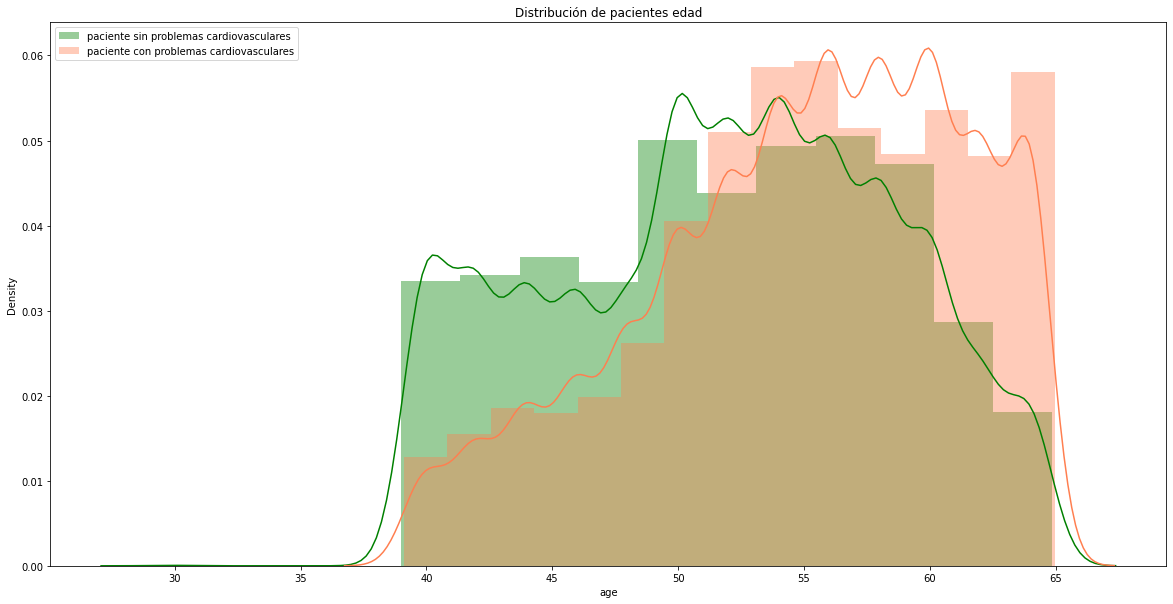

In [21]:
fig, axi = plt.subplots(1,figsize=(20,10))

# Sin problemas cardiovasculares
sns.distplot(data['age'][data['cardio']==0], ax = axi, color='green', 
             label = 'paciente sin problemas cardiovasculares', bins=15)
# Con problemas cardiovasculares
sns.distplot(data['age'][data['cardio']==1], ax = axi, color='coral', 
             label = 'paciente con problemas cardiovasculares', bins=15)

axi.set_title('Distribución de pacientes edad')
axi.legend()
plt.show()

Del historgrama podemos notar que mientras va aumentando la edad del paciente, este es mas propenso a sufrir una enfermedad cardiovascular. Aproximadamente después de los 55 de edad esta tendencia creme enormemente.

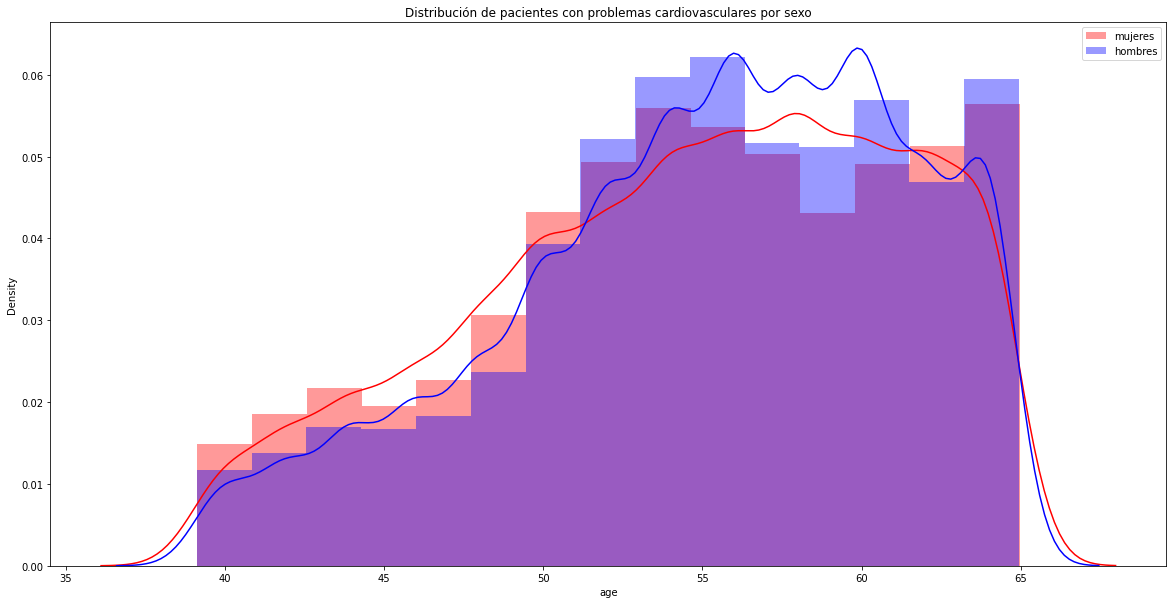

In [22]:
fig, axi = plt.subplots(1,figsize=(20,10))
# Hombres con problemas cardiovasculares
sns.distplot(data['age'][(data['gender']==1) & (data['cardio']==1)],ax = axi,color='red', 
             label ='mujeres', bins=15)
# Mujeres con problemas cardiovasculares
sns.distplot(data['age'][(data['gender']==0) & (data['cardio']==1)],ax = axi,color='blue', 
             label = 'hombres', bins=15)

axi.set_title('Distribución de pacientes con problemas cardiovasculares por sexo')
axi.legend()
plt.show()

Aquí hay una relación bastante interesante. Parece ser que las mujeres tienden a padecer alguna enfermedad cardiovascular en mayor proporción que los hombres, sin embargo después de los 52 años de edad, la tendencia de las mujeres empieza a bajar y la de los hombres se dispara, haciendo a estos últimos mas propensos a estas enfermedades que las mujeres.

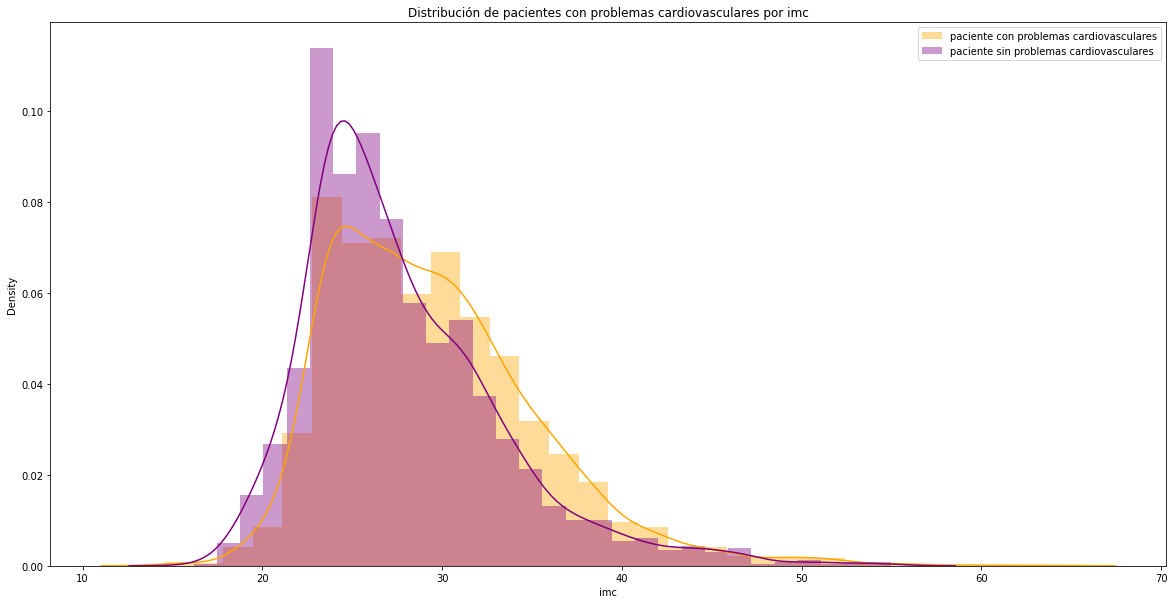

In [23]:
fig, axi = plt.subplots(1,figsize=(20,10))
# Personas enfermas
sns.distplot(data['imc'][(data['cardio']==1) & filtro],ax = axi,color='orange', 
             label ='paciente con problemas cardiovasculares', bins=30)
# Personas no enfermas
sns.distplot(data['imc'][(data['cardio']==0) & filtro],ax = axi,color='purple', 
             label = 'paciente sin problemas cardiovasculares', bins=30)

axi.set_title('Distribución de pacientes con problemas cardiovasculares por imc')
axi.legend()
plt.show()

Aquí podemos corroborar algo que suponiamos, a mayor imc hay una mayor incidencia de personas que desarrollan enfermedades cardiovasculaes.

## Comparando diferentes modelos predictivos
<p>Lo primero será separar nuestra variable objetivo del resto de los datos.</p>

In [24]:
# separamos la variable objetivo del resto de los datos
x = data.drop(["cardio"], axis=1,inplace=False)
y = data["cardio"]

# Separamos el conjunto de datos de entrenamiento de el de pruebas (80% y 20% respectivamente)
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<p>Despúes para poder empezar a entrenar nuestros modelos para luego compararlos, debemos escalar nuestros datos, para esto podemos elegir entre varios metódos, los mas usados son, <b>normalización</b> y <b>estandarización</b>.  <a href="https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf">Más información aquí</a>.</p>
<p>En este caso vamos a probar normalizando los datos.</p>

In [25]:
# normalizando las variables de entrada
#from sklearn.preprocessing import normalize
#x_train = normalize(x_train)
#x_test = normalize(x_test)

In [26]:
# estandarizando las variables de entrada
datos_estandarizacion = {}
def standartization(x,s_list):
    x_std = x.copy(deep=True)
    for column in s_list:
        mean = x_std[column].mean()
        std = x_std[column].std()
        x_std[column] = (x_std[column]-mean)/std
        datos_estandarizacion[column] = {'mean':mean,'std':std}
    return x_std

s_list = ["age", "height", "weight", "ap_hi", "ap_lo", "imc"]
x_train = standartization(x_train,s_list)
x_test = standartization(x_test,s_list)

### Probando con algunos modelos predictivos de sckit-learn

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

# mostrando resultados
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
SVM,0.733149
KNN,0.730161
Random forest,0.710195
Naive bayes,0.705822
Decision tree,0.630329


<ul>
    <li><p>Probando la <b>normalización</b> de los datos, obtenemos los siguientes resultados:<img src="resultados_normalizando.png"></p></li>
    <li><p>Probando la <b>estandarización</b> de los datos, obtenemos los siguientes resultados:<img src="resultados_estandarizando.png"></p></li>
    <li><p>Si no escalamos de ninguna manera los datos, obtenemos los siguientes resultados:<img src="resultados_sin_escalar.png"></p></li>
</ul>
<p>Obtaremos entonces por utilizar el modelo <a href="https://es.wikipedia.org/wiki/M%C3%A1quinas_de_vectores_de_soporte">SVM</a> estandarizando los datos. Así que lo siguiente que haremos será <a href="https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/">guardar</a> el modelo para poder utilizarlo en el futuro.</p>

In [33]:
# guardamos el modelo con Joblib de SciPy
import joblib
nombre_archivo = "cardio_nutridesk_v1.model"
joblib.dump(models['SVM'], nombre_archivo)

['cardio_nutridesk_v1.model']

In [29]:
# después para hacer una predicción solo volmenos a cargar el modelo
modelo_cargado = joblib.load(nombre_archivo)
result = modelo_cargado.score(x_test, y_test)
print(result)

0.7331487284121547


In [30]:
x_test.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,imc
27240,0.787710,0,0.453542,-0.628103,-0.391963,-0.130619,2,2,0,0,0,-0.841004
64093,0.668540,0,-0.823586,0.554947,-0.391963,-0.130619,1,0,0,0,1,1.048100
61403,1.544335,1,0.581255,-0.697694,-0.391963,-0.130619,0,0,0,1,0,-0.960668
16034,1.357300,1,1.475245,0.346174,0.212782,-0.130619,0,0,0,0,1,-0.365023
69728,0.778015,1,1.986096,1.668406,0.212782,-0.130619,2,2,1,0,1,0.547715


In [31]:
# para los datos de prueba debemos volver a estandarizar estos datos
prueba =[[22,1,1.74,65,90,70,0,0,0,1,0,21.5]]
p_data = pd.DataFrame(data=prueba, columns = ['age','gender','height','weight','ap_hi',
                                       'ap_lo','cholesterol','gluc','smoke','alco','active','imc'])

s_list = ["age", "height", "weight", "ap_hi", "ap_lo", "imc"]
de = datos_estandarizacion
for column in s_list:
    p_data[column] = (p_data[column]-de[column]['mean'])/de[column]['std']

p_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,imc
0,-4.611678,1,1.219819,-0.628103,-2.206199,-1.190509,0,0,0,1,0,-1.135426


In [32]:
# predecimos los datos estandarizados
# esta persona es sana en la realidad, por lo tanto la predicción es correcta
modelo_cargado.predict(p_data)

array([0], dtype=int64)